<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Task 1: Loading Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [3]:
y = df.diagnosis
drop_cols = ['id','diagnosis','Unnamed: 32']
x = df.drop(columns=drop_cols)

In [4]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Task 3: Plot Diagnosis Distributions
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [5]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

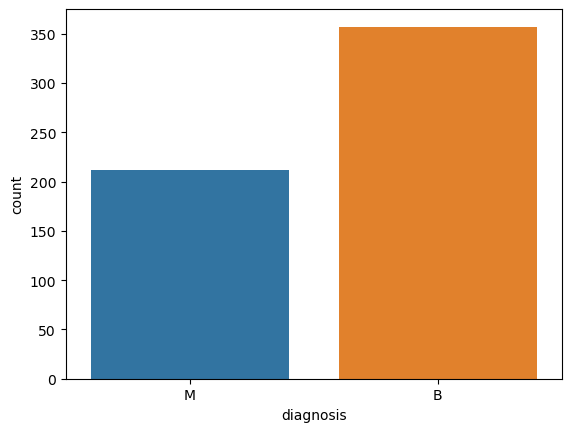

In [6]:
ax = sns.countplot(x=y,label='Count')

<h2 align=center> Data Visualization </h2>

---

<AxesSubplot: xlabel='features', ylabel='value'>

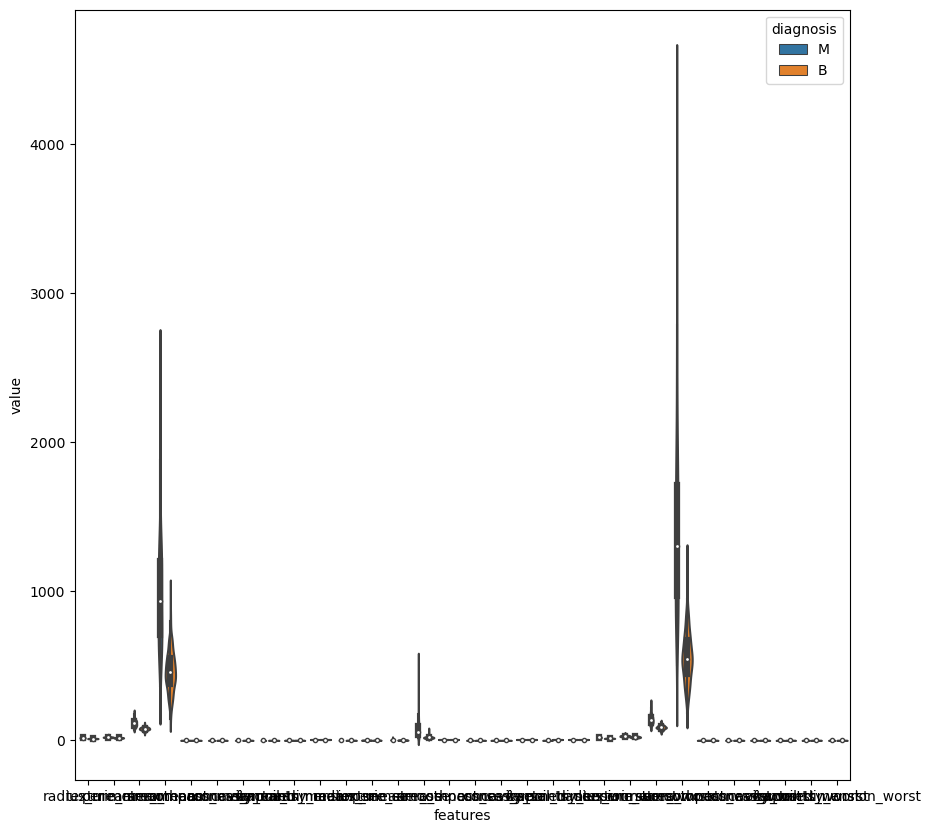

In [7]:
# without normalizing mean values of all columns
data = pd.concat([x,y],axis=1)
# data.head()
df1 = pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(data = df1,x='features',y='value',hue='diagnosis')
# data.describe()

### Task 4: Visualizing Standardized Data with Seaborn
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

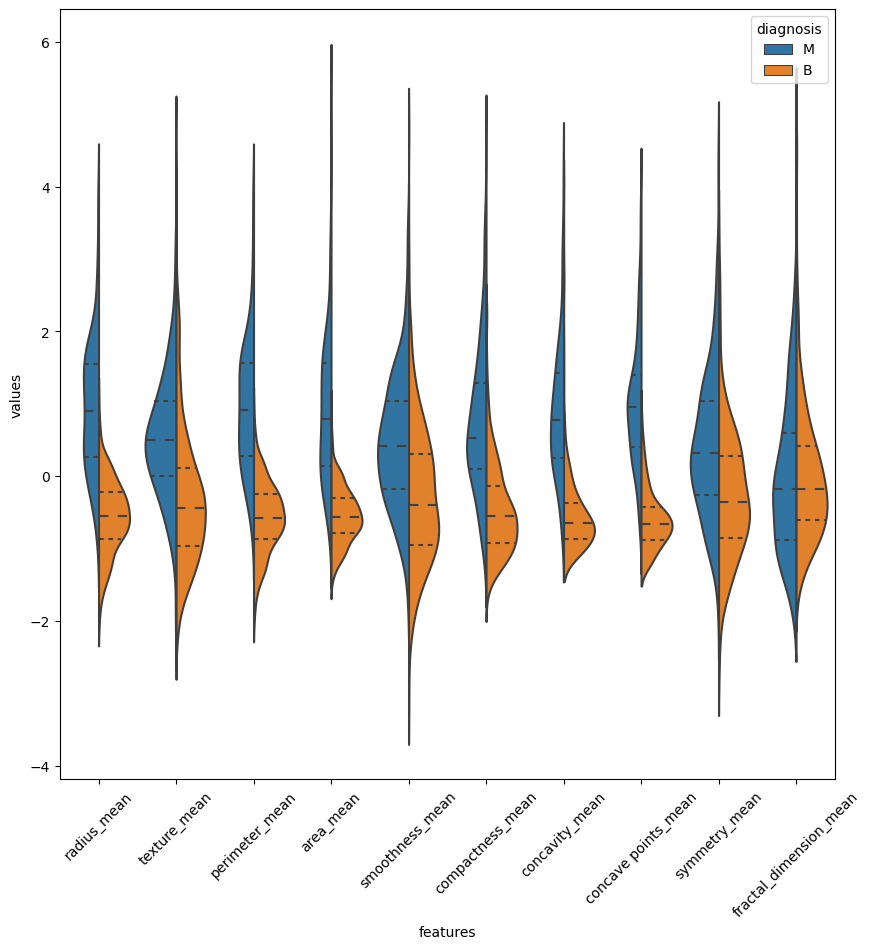

In [8]:
# final Violen plot with normalizing 
data = x                                        # data has 0-29  total 30 columns
data_std = (data - data.mean())/data.std()      # normalizing
data = pd.concat([y,data_std.iloc[:,:10]],axis=1)
dataf = pd.melt(data, id_vars='diagnosis',var_name='features',value_name='values')
plt.figure(figsize=(10,10))
sns.violinplot(data = dataf,x='features',y='values',hue='diagnosis',split=True,inner='quart');
plt.xticks(rotation=45);


### Task 5: Violin Plots and Box Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

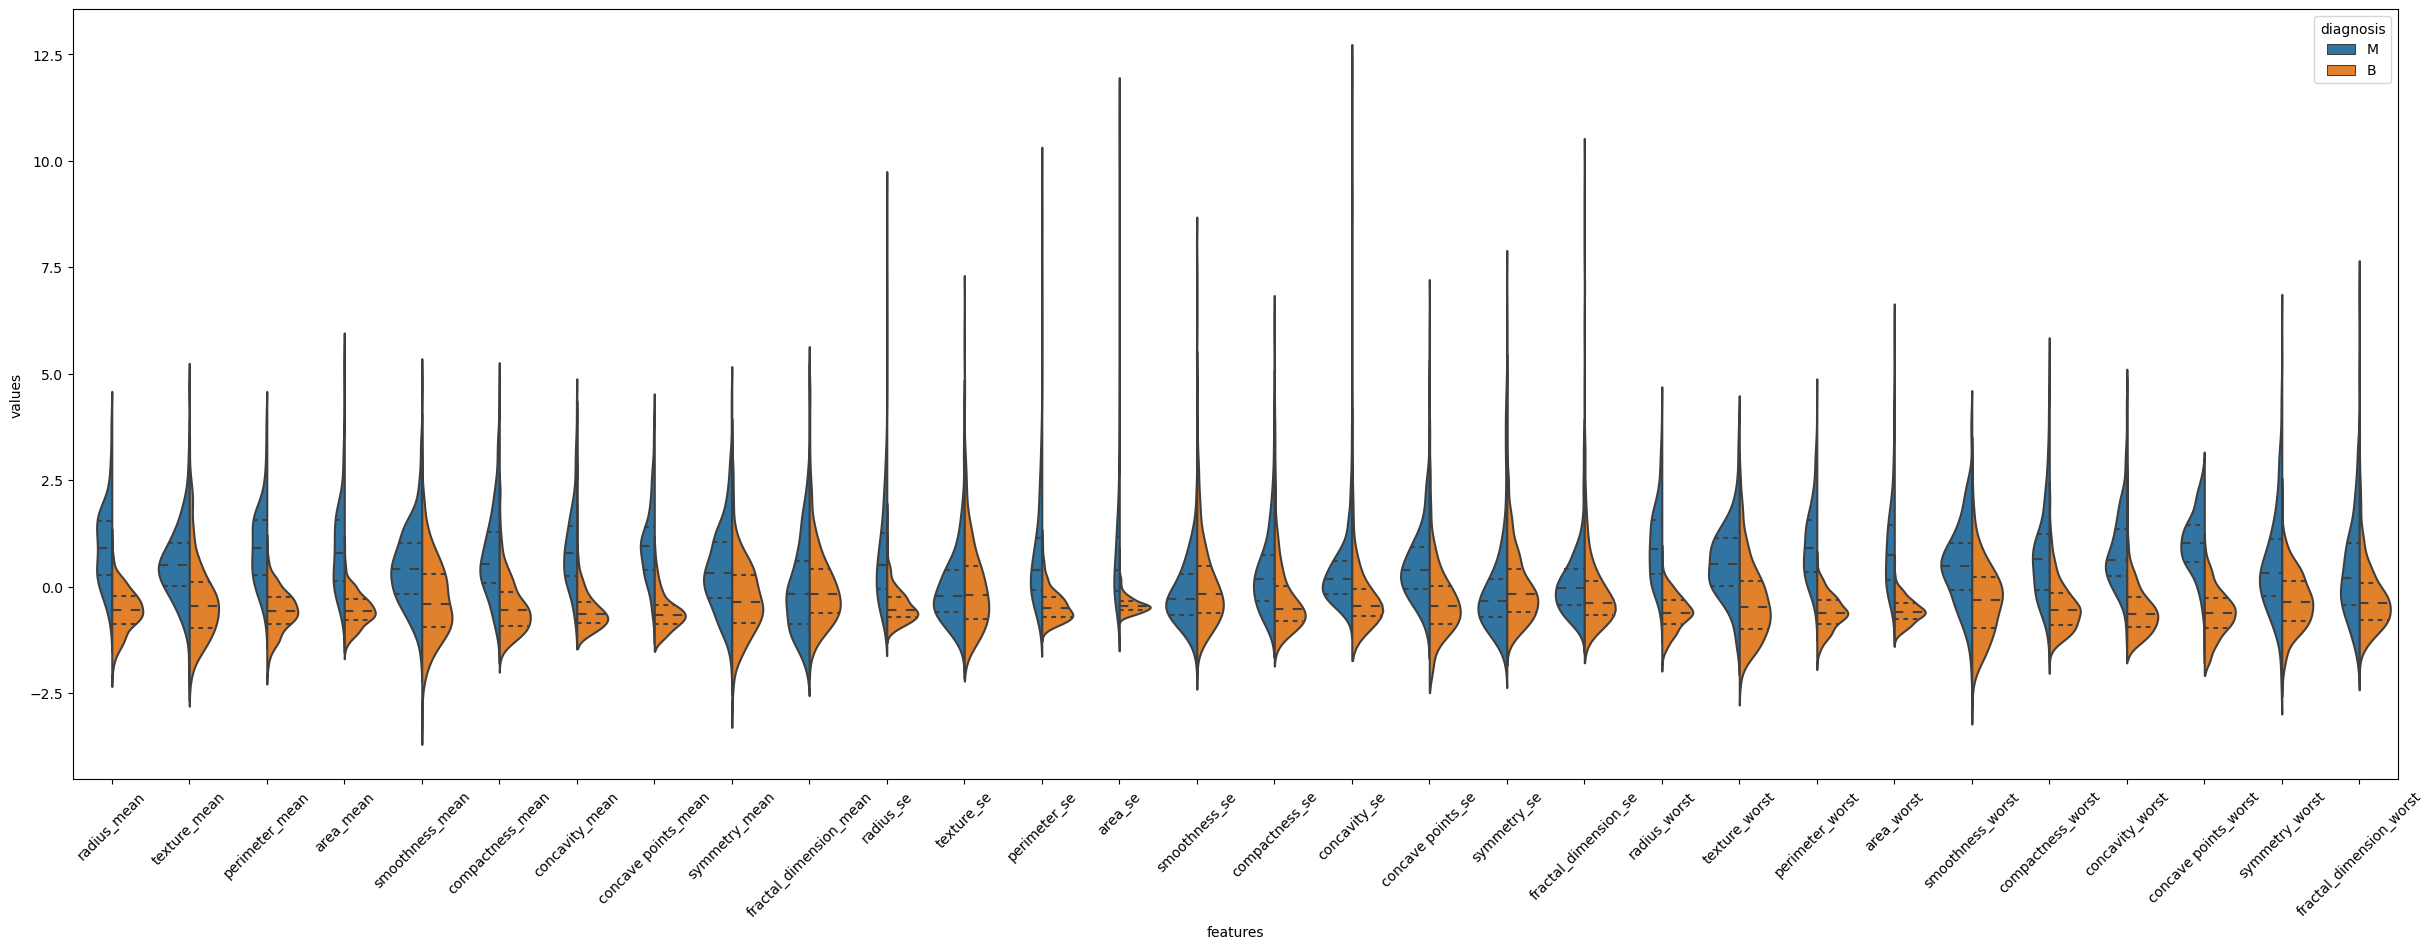

In [9]:
data = pd.concat([y,data_std.iloc[:,:30]],axis=1)           # all 30 cols
dataf = pd.melt(data, id_vars='diagnosis',var_name='features',value_name='values')
plt.figure(figsize=(30,10))
sns.violinplot(data = dataf,x='features',y='values',hue='diagnosis',split=True,inner='quart');
plt.xticks(rotation=45);

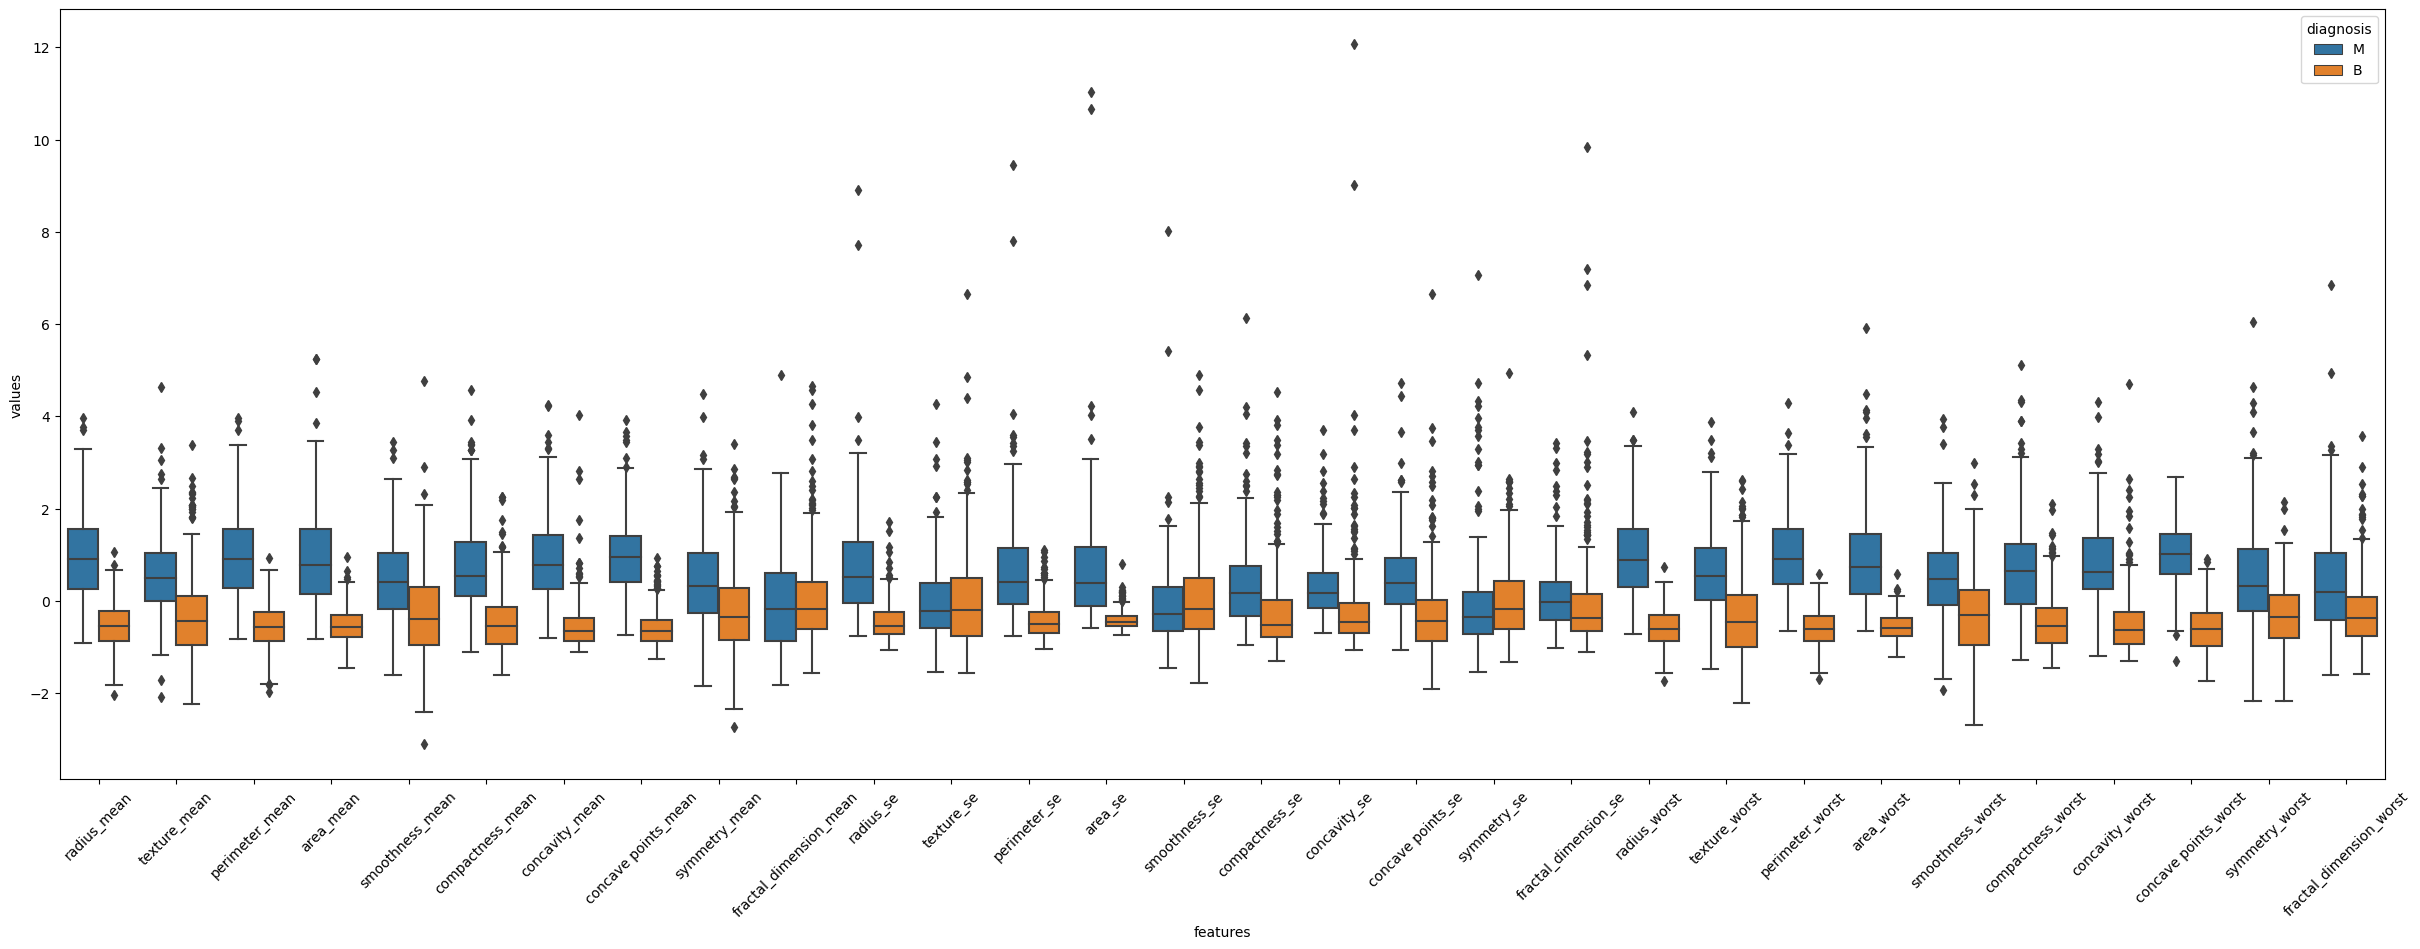

In [10]:
# box plot for whole data all 30 cols
plt.figure(figsize=(30,10))
sns.boxplot(data = dataf,x='features',y='values',hue='diagnosis');
plt.xticks(rotation=45);

### Task 6: Using Joint Plots for Feature Comparison
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

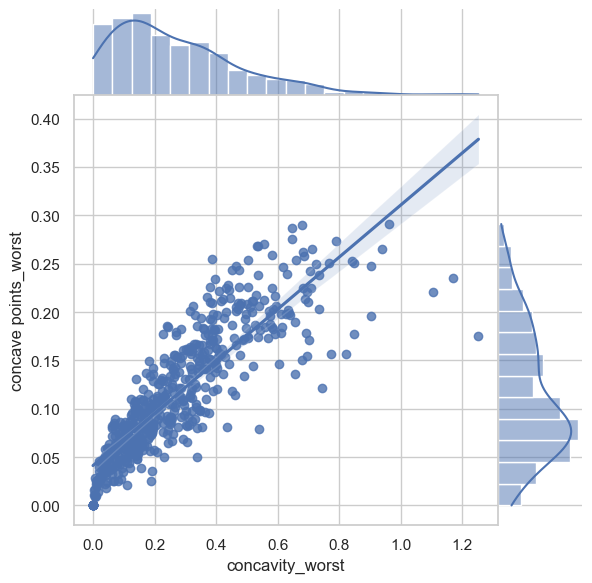

In [14]:
sns.set(style='whitegrid')
sns.jointplot(data=x,x='concavity_worst',y='concave points_worst',kind='reg',space=0)


### Task 7: Observing the Distribution of Values and their Variance with Swarm Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

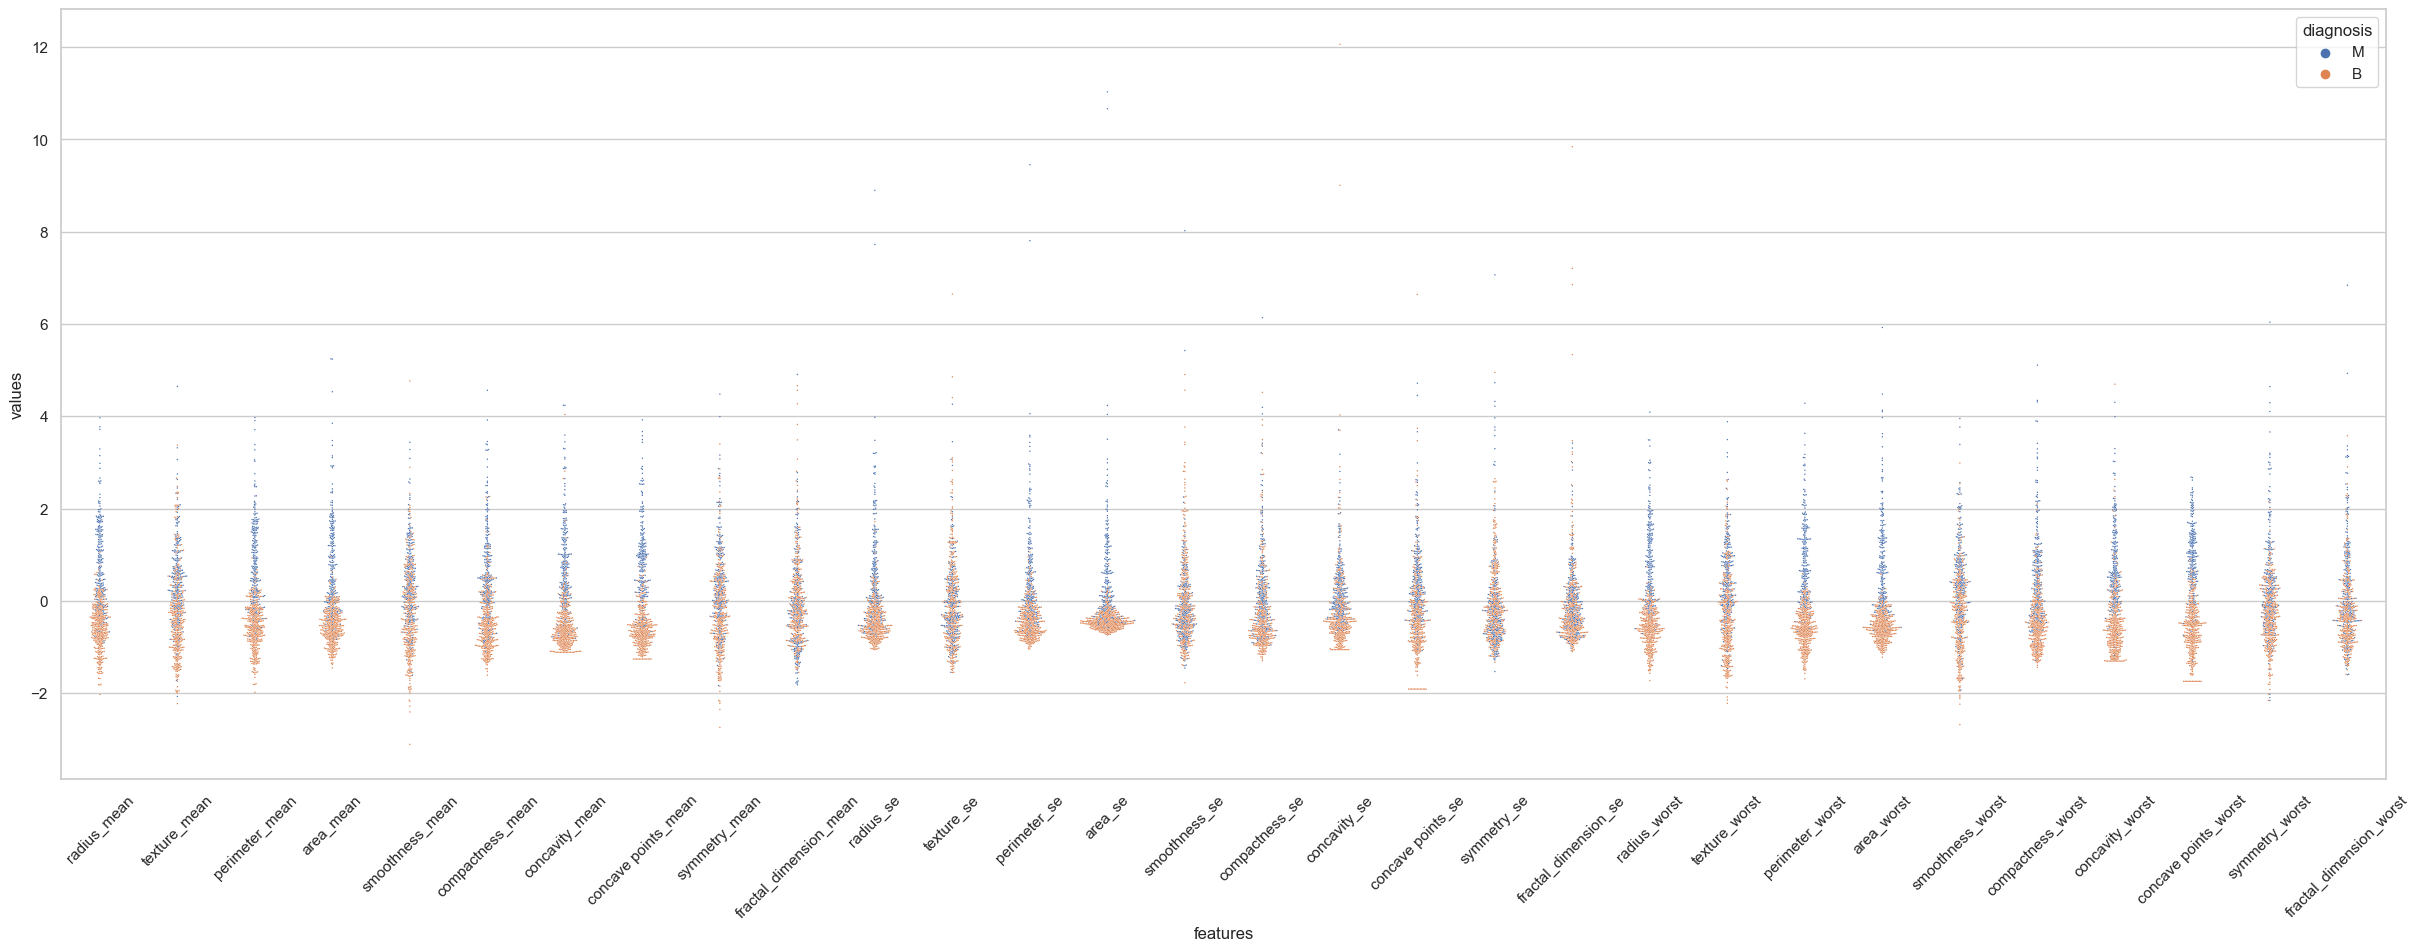

In [20]:
plt.figure(figsize=(30,10))
sns.swarmplot(data = dataf,x='features',y='values',hue='diagnosis',size=1);
plt.xticks(rotation=45);

### Task 8: Observing all Pair-wise Correlations
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

<AxesSubplot: >

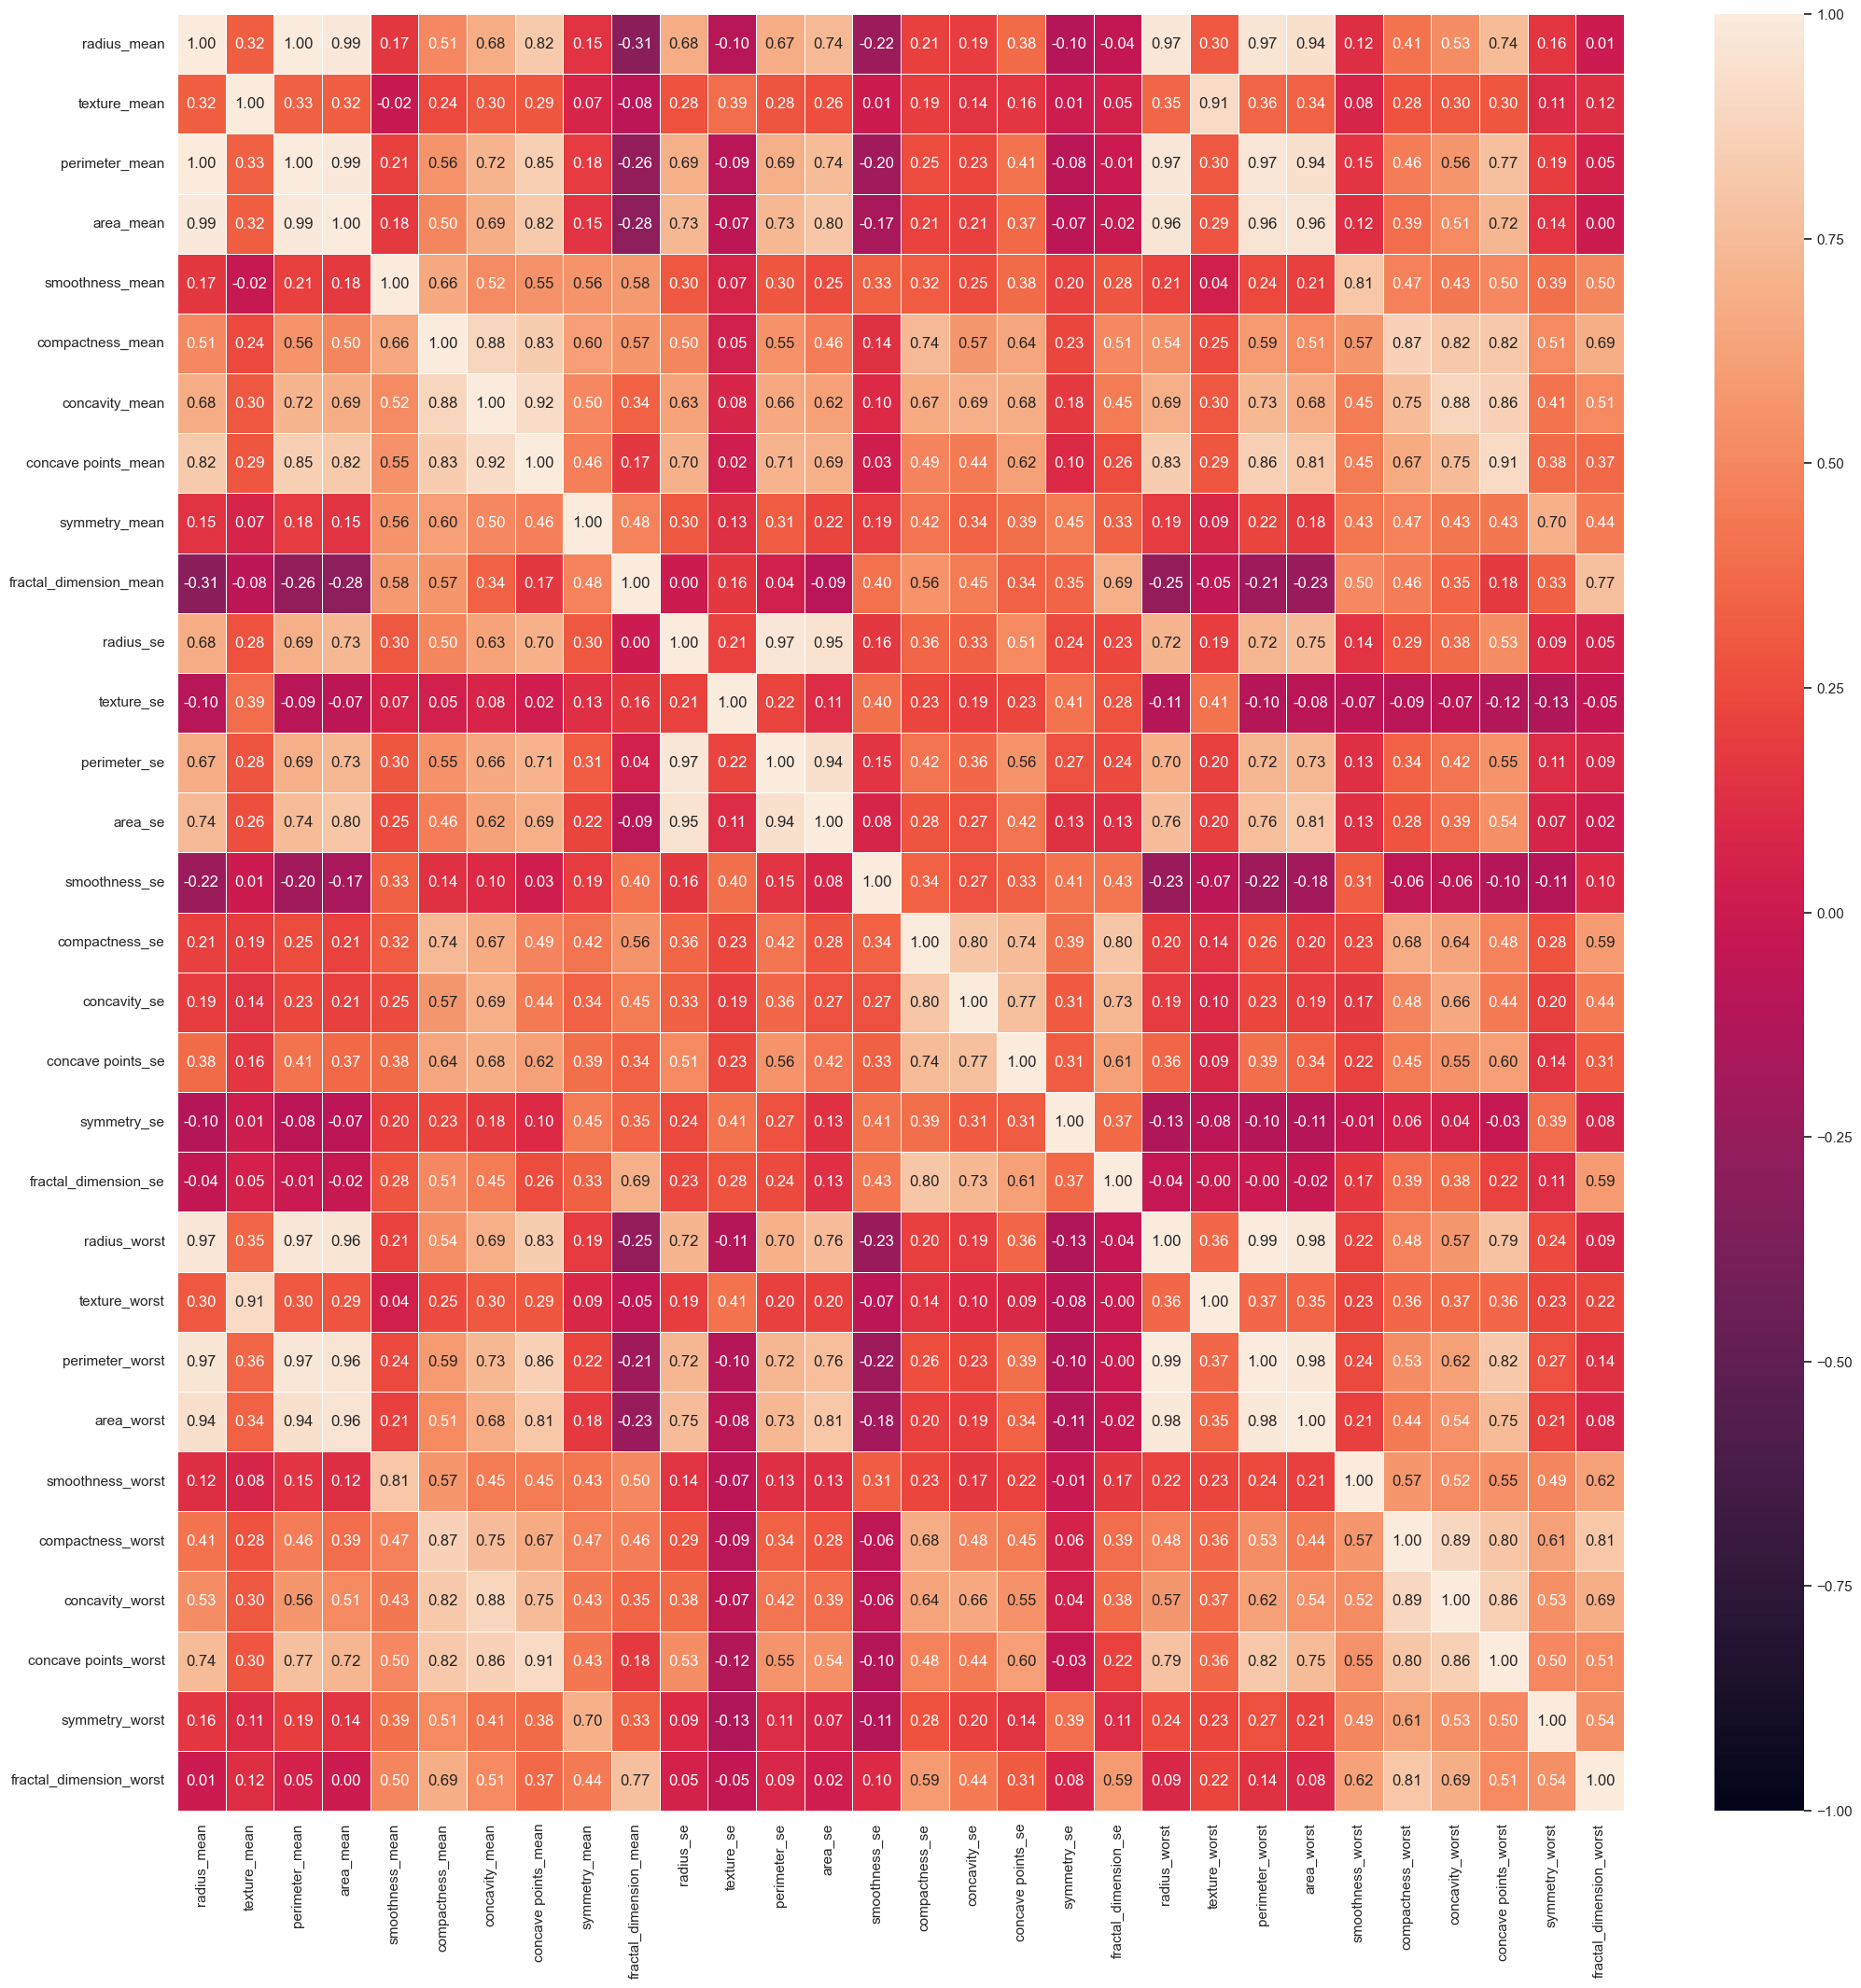

In [25]:
plt.figure(figsize=(25,25))
sns.heatmap(x.corr(),annot=True,linewidth=0.5,fmt='.2f',vmin=-1, vmax=1)